# 特征提取

值得一提的是，HSV是通过本目录下hsv_extractor.py这个程序来提取的。

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(-0.5, 549.5, 333.5, -0.5)

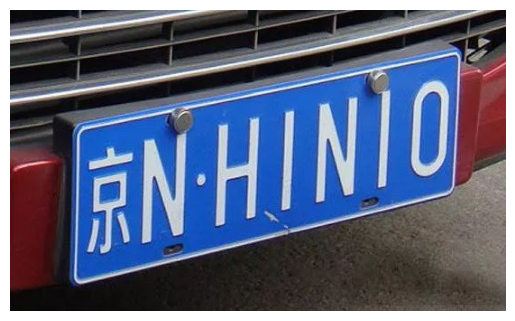

In [53]:
# 读取图像,并转化为灰度图
image = cv2.imread("./images/car2.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')


In [57]:
# 得到图像的shape参数（为了以后的旋转做准备）
shape = image.shape
# 根据前一个程序得到图像的阈值
mask = [(75, 164, 86), (120, 255, 255)]
# 建立一个mask
image2 = cv2.inRange(cv2.cvtColor(image,cv2.COLOR_RGB2HSV), mask[0], mask[1])

# 为了得到更好的矩形
# 进行一次高斯变化
blurred = cv2.GaussianBlur(image2, (5, 5), 0, 0, cv2.BORDER_DEFAULT)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# 先使用一次闭运算然后再使用一次开运算处理图像
image2 = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel, iterations=1)
image2 = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel, iterations=1)


# 查找矩阵中所有的轮廓线
contours, hierarchy = cv2.findContours(
    image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


其实这里面的轮廓有很多，为了能够检测到车牌那个轮廓，我需要求出轮廓的最大值，最大值一定是目标轮廓。

In [55]:
a = []
# 寻找出最长的轮廓线，并做标记
for contour in contours:
    arclength = cv2.arcLength(contour, True)
    # print(arclength)
    a.append(arclength)  # 长度保存在数组中
maxlen = max(a)
# 找出最长的边界
for contour in contours:
    arclength = cv2.arcLength(contour, True)
    if arclength == maxlen:
        # cv2.drawContours(image, contour, -1, (255, 255, 0), 3)      # 画出轮廓
        # 标记出轮廓的最小矩形
        rec = cv2.minAreaRect(contour)
        # 求出最小外接矩形的四个点
        box = cv2.boxPoints(rec)
        box = np.int0(box)                                          # 转化成int形式
        cv2.drawContours(image, [box], 0, (255, 0, 0),
                         2)             # 根据给出的点画一个轮廓
        M = cv2.getRotationMatrix2D(
            (shape[1] / 2.0, shape[0] / 2.0), -90 + rec[2], 1)   # 旋转的角度是测出的矩阵+90degree
        image_aim = cv2.warpAffine(image, M, (shape[1], shape[0]), flags=cv2.INTER_LINEAR,
                                   borderValue=(0, 0, 0))  # 最近邻值,边界用灰色填充


(-0.5, 549.5, 333.5, -0.5)

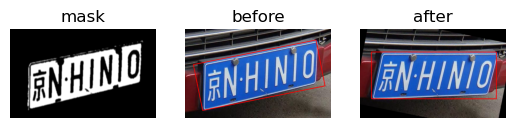

In [56]:
plt.subplot(131)
plt.imshow(image2,cmap='gray')
plt.title("mask")
plt.axis('off')

plt.subplot(132)
plt.imshow(image)
plt.title("before")
plt.axis('off')

plt.subplot(133)
plt.imshow(image_aim)
plt.title("after")
plt.axis('off')
